83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/100
10/10 [==============================] - 22s 2s/step - loss: 0.3975 - accuracy: 0.8409 - val_loss: 0.2599 - val_accuracy: 0.9610
Epoch 2/100
10/10 [==============================] - 16s 2s/step - loss: 0.1868 - accuracy: 0.9805 - val_loss: 0.1787 - val_accuracy: 0.9610
Epoch 3/100
10/10 [==============================] - 15s 2s/step - loss: 0.1290 - accuracy: 0.9968 - val_loss: 0.1395 - val_accuracy: 0.9870
Epoch 4/100
10/10 [==============================] - 15s 2s/step - loss: 0.1010 - accuracy: 1.0000 - val_loss: 0.1167 - val_accuracy: 0.9870
Epoch 5/100
10/10 [==============================] - 16s 2s/step - loss: 0.0837 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.9870
Epoch 6/100
10/10 [==============================] - 15s 2s/step - loss: 0.0720 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9870
Epoch 7/100
10/10 [==============================] - 15s 2s/step - loss: 0.0632 - accurac

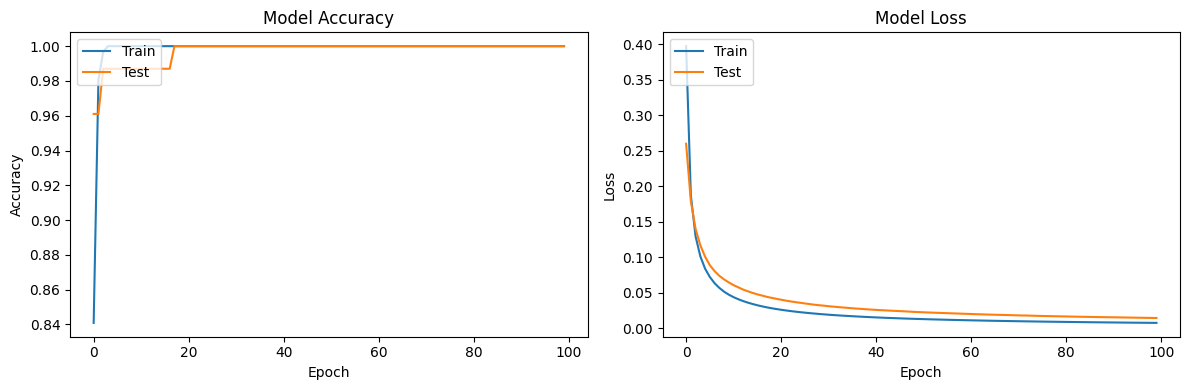

Results, metrics, confusion matrix, and training history have been saved successfully.


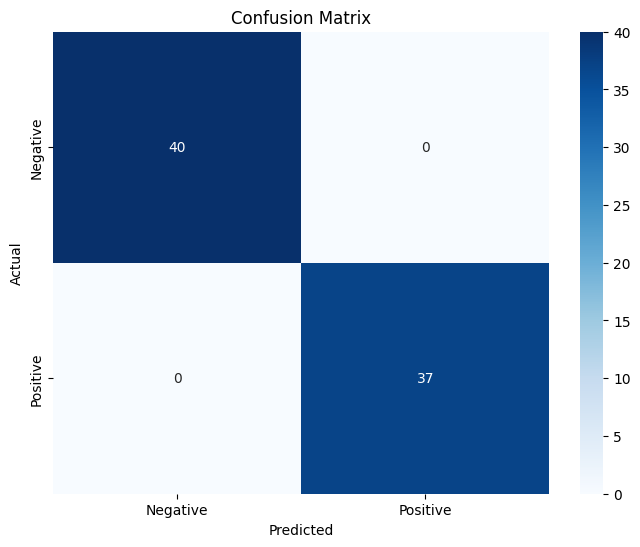

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import CSVLogger
import pandas as pd

# Load data from positive and negative directories
def load_data_from_directories(pos_directory, neg_directory, img_size=(100, 100)):
    positive_images = []
    negative_images = []

    # Load positive images
    for filename in os.listdir(pos_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(pos_directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize image
            positive_images.append(img)

    # Load negative images
    for filename in os.listdir(neg_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(neg_directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize image
            negative_images.append(img)

    return np.array(positive_images), np.array(negative_images)

# Directories containing positive and negative images
positive_directory = '/content/drive/MyDrive/positive images lab'
negative_directory = '/content/drive/MyDrive/negative images lab'

# Load data
positive_images, negative_images = load_data_from_directories(positive_directory, negative_directory)

# Create labels
positive_labels = np.ones(len(positive_images))
negative_labels = np.zeros(len(negative_images))

# Combine images and labels
X = np.concatenate((positive_images, negative_images), axis=0)
y = np.concatenate((positive_labels, negative_labels), axis=0)

# Normalize pixel values
X = X / 255.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Xception model
def create_xception_model(input_shape):
    base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create Xception model
input_shape = X_train[0].shape
xception_model = create_xception_model(input_shape)

# Compile the Xception model
xception_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Define file paths for logging
csv_logger_path = '/content/drive/MyDrive/sgdXception_100_training_history_lab.csv'
confusion_matrix_path = '/content/drive/MyDrive/sgdXception_100_confusion_matrix_lab.csv'
classification_report_path = '/content/drive/MyDrive/sgdXception_100_classification_report_lab.csv'

# Define CSVLogger callback
csv_logger = CSVLogger(csv_logger_path)

# Train the Xception model with 100 epochs and use the CSVLogger callback
xception_history = xception_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[csv_logger])

# Evaluate the Xception model
xception_test_loss, xception_test_accuracy = xception_model.evaluate(X_test, y_test)

print("Xception Test Loss:", xception_test_loss)
print("Xception Test Accuracy:", xception_test_accuracy)

# Generate predictions
xception_y_pred_probs = xception_model.predict(X_test)
xception_y_pred = (xception_y_pred_probs > 0.5).astype(int)

# Calculate accuracy
xception_accuracy = accuracy_score(y_test, xception_y_pred)
print("Xception Accuracy:", xception_accuracy)

# Calculate confusion matrix
xception_confusion_mat = confusion_matrix(y_test, xception_y_pred)
print("Xception Confusion Matrix:\n", xception_confusion_mat)

# Generate classification report
xception_class_report = classification_report(y_test, xception_y_pred)
print("Xception Classification Report:\n", xception_class_report)

# Convert confusion matrix to DataFrame
xception_confusion_df = pd.DataFrame(xception_confusion_mat, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

# Print the confusion matrix
print("Confusion Matrix DataFrame:\n", xception_confusion_df)

# Save confusion matrix to CSV
xception_confusion_df.to_csv(confusion_matrix_path)

# Convert classification report to DataFrame
xception_class_report_df = pd.DataFrame(classification_report(y_test, xception_y_pred, output_dict=True)).transpose()

# Save classification report to CSV
xception_class_report_df.to_csv(classification_report_path)

# Save the trained model
xception_model_save_path = '/content/drive/MyDrive/sgdXception_100_model_lab'
xception_model.save(xception_model_save_path)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the results to a CSV file
xception_results = pd.DataFrame({
    'True Labels': y_test,
    'Predicted Labels': xception_y_pred.flatten()  # Flatten predictions to match shape
})
xception_results.to_csv('/content/drive/MyDrive/sgdXception_100_results_lab.csv', index=False)

# Save the training history to a CSV file
history_df = pd.DataFrame(xception_history.history)
history_df.to_csv('/content/drive/MyDrive/sgdXception_100_history_lab.csv', index=False)

# Save the performance metrics to a CSV file
metrics_df = pd.DataFrame({
    'Metric': ['Loss', 'Accuracy'],
    'Value': [xception_test_loss, xception_test_accuracy]
})
metrics_df.to_csv('/content/drive/MyDrive/sgdXception_100_metrics_lab.csv', index=False)

# Append confusion matrix and classification report to the results CSV file
with open('/content/drive/MyDrive/sgdXception_100_results_lab.csv', 'a') as f:
    f.write('\n\n')  # Add a blank line
    f.write(f"Xception Test Loss:, {xception_test_loss}\n")
    f.write(f"Xception Test Accuracy:, {xception_test_accuracy}\n\n")

    f.write("Xception Confusion Matrix:\n")
    xception_confusion_df.to_csv(f, index=True)

    f.write("\n\n")
    f.write("Xception Classification Report:\n")
    f.write(xception_class_report)

print("Results, metrics, confusion matrix, and training history have been saved successfully.")

# Function to plot confusion matrix
def plot_confusion_matrix(confusion_mat, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
class_names = ['Negative', 'Positive']
plot_confusion_matrix(xception_confusion_mat, class_names)